***Data Science Internship Program***
===================================

>**Industry-Cognifyz Technologies<br>
Name-Hari Om**

***Level 2***
===

***Task 1 : Table Booking and Online Delivery :-***<br>
-Determine the percentage of restaurants that offer table booking and online delivery.<br>
-Compare the average ratings of restaurants with table booking and those without.<br>
-Analyze the availability of online delivery among restaurants with different price ranges.

***Task 2 :Price Range Analysis :-***<br>
-Determine the most common price range among all the restaurants.<br>
-Calculate the average rating for each price range.<br>
-Identify the color that represents the highest average rating among different price ranges.

***Task 3 : Feature Engineering :-***<br>
-Extract additional features from the existing columns, such as the length of the restaurant name or address.<br>
-Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.




<BR>

***Level 2***
===
***Task 1 :Table Booking and Online Delivery :-***<br>
***------------------------------------------------------***

In [224]:
 # import libraries import

import matplotlib. pyplot as plt


In [225]:
# Load the dataset

data_set= pd.read_csv('C:/Users/hari9/Downloads/Dataset  (1).csv')

In [226]:
#1.Determine the percentage of restaurants that offer table booking and online delivery

restaurants_number = len(data_set)
print("Total number of restaurants =",restaurants_number,"\n")
table_booking = data_set[data_set['Has Table booking'] == 'Yes'].shape[0]
percentage__booking = (table_booking / restaurants_number) * 100

online_delivery_count = data_set[data_set['Has Online delivery'] == 'Yes'].shape[0]
online_delivery_percentage = (online_delivery_count / restaurants_number) * 100
print(data_set["Has Table booking"].value_counts())
print("\n")
print(data_set["Has Online delivery"].value_counts())
print("\n")
print(f"Percentage of restaurants offering table booking = {percentage__booking:.2f}%")
print(f"Percentage of restaurants offering online delivery = {online_delivery_percentage:.2f}%")


Total number of restaurants = 9551 

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64


Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


Percentage of restaurants offering table booking = 12.12%
Percentage of restaurants offering online delivery = 25.66%


In [227]:
# 2.Compare the average ratings of restaurants with table booking and those without.

with_table_booking = data_set[data_set['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
without_table_booking = data_set[data_set['Has Table booking'] == 'No']['Aggregate rating'].mean()
print("""Average rating :-
-----------------""")
print(f"with table booking: {with_table_booking:.2f}")
print(f"without table booking: {without_table_booking:.2f}")


Average rating :-
-----------------
with table booking: 3.44
without table booking: 2.56


Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
dtype: float64


C:\Users\hari9\AppData\Local\Temp\ipykernel_22968\638133516.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  price_range = data_set.groupby('Price range').apply(lambda x: (x['Has Online delivery'] == 'Yes').mean() * 100)


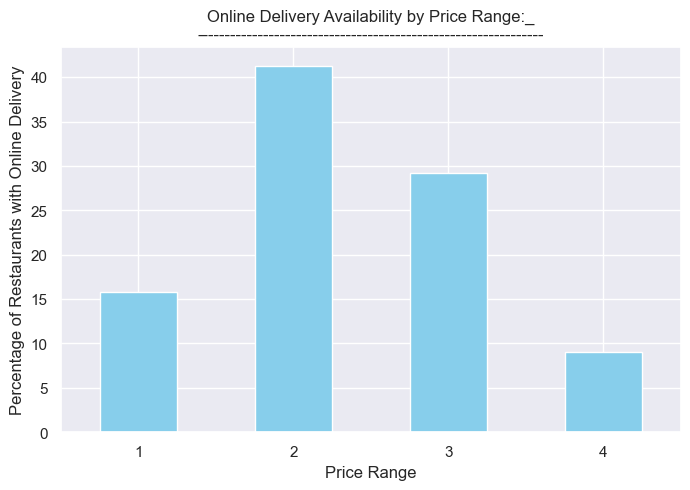

In [228]:
# 3.Analyze the availability of online delivery among restaurants with different price ranges.
price_range = data_set.groupby('Price range').apply(lambda x: (x['Has Online delivery'] == 'Yes').mean() * 100)
print(price_range)
price_range.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.title("""Online Delivery Availability by Price Range:_
---------------------------------------------------------------""")
plt.xticks(rotation=0)
plt.show()


***Task 2 :Price Range Analysis :-***<br>
***------------------------------------***

In [229]:
#1.Determine the most common price range among all the restaurants.
price_range = data_set['Price range'].value_counts()
print(price_range,"\n" )
price_range = data_set['Price range'].mode()[0]
print(f"The most common price range is: {price_range}")


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64 

The most common price range is: 1


In [230]:
#2.Calculate the average rating for each price range.
price_range = data_set.groupby('Price range')['Aggregate rating'].mean().round(2)
print("""average rating for each price range:-
--------------------------------------\n""",price_range)


average rating for each price range:-
--------------------------------------
 Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


In [231]:
#3. Identify the color that represents the highest average rating among different price ranges.
# Find the price range with the highest average rating
highest_price_rating = data_set.loc[data_set['Aggregate rating'].idxmax(), 'Price range']
color = data_set[data_set['Price range'] == highest_price_rating]['Rating color'].mode()[0]

print(f"The color that represents the highest average rating among different price ranges is {color}")


The color that represents the highest average rating among different price ranges is Yellow


***Task 3 : Feature Engineering :-***<br>
***-------------------------------------***

In [232]:
# 1.Extract additional features from the existing columns, such as the length of the restaurantname or address.
data_set['Name Length'] = data_set['Restaurant Name'].apply(len) 
data_set['Address Length'] = data_set['Address'].apply(len)
print(data_set[['Restaurant Name', 'Name Length','Address', 'Address Length']].head())
print("\n",data_set.columns)


          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  

 Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Agg

In [233]:
# 2.Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

data_set['Table Booking'] = data_set['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
data_set['Online Delivery'] = data_set['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
print(data_set[['Has Table booking', 'Table Booking','Has Online delivery', 'Online Delivery']].head())


  Has Table booking  Table Booking Has Online delivery  Online Delivery
0               Yes              1                  No                0
1               Yes              1                  No                0
2               Yes              1                  No                0
3                No              0                  No                0
4               Yes              1                  No                0
